## Example how to use SuperPoint pipeline.

In [1]:
import use_superpoint
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

### Load and initialize SuperPoint model.

In [3]:
model = use_superpoint.load_superpoint()

#### Load images

In [4]:
img1 = cv2.imread('../data/v_churchill/1.ppm', 0)
img2 = cv2.imread('../data/v_churchill/4.ppm', 0)

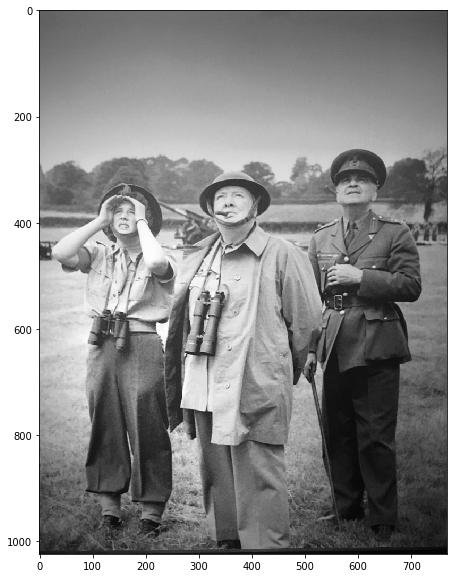

In [5]:
plt.imshow(img1, cmap='gray')
plt.show()

### Compute keypoints and descriptors from images

In [6]:
kp1, desc1, heatmap1 = use_superpoint.compute(model, img1)
kp2, desc2, heatmap2 = use_superpoint.compute(model, img2)

### Find matches between descriptors

In [7]:
matches = use_superpoint.nn_match_two_way(desc1, desc2, model.nn_thresh)

#### Transform matches to OpenCV conform objects
This is only necessary if you want to draw keypoints and matches and want to use OpenCV's functions instead of writing your own.

In [8]:
matches_cv2 = use_superpoint.matches2DMatch(matches)

#### Upscale keypoints
If you want to show keypoints and matches on the original images, you have to upscale them, since SuperPoint finds keypoints on lower resolution images per default.

In [9]:
kp1_large = use_superpoint.scale_kps(model, img1, kp1)
kp2_large = use_superpoint.scale_kps(model, img2, kp2)

### Transform keypoints to OpenCV conform objects

In [11]:
kp1_cv2 = use_superpoint.kps2KeyPoints(kp1_large)
kp2_cv2 = use_superpoint.kps2KeyPoints(kp2_large)

In [12]:
out = cv2.drawMatches(img1, kp1_cv2, 
                      img2, kp2_cv2, 
                      matches_cv2, None,
                      matchColor=(0, 255, 0),
                      singlePointColor=(255, 0, 0),
                      flags=2)

#### Plot matches

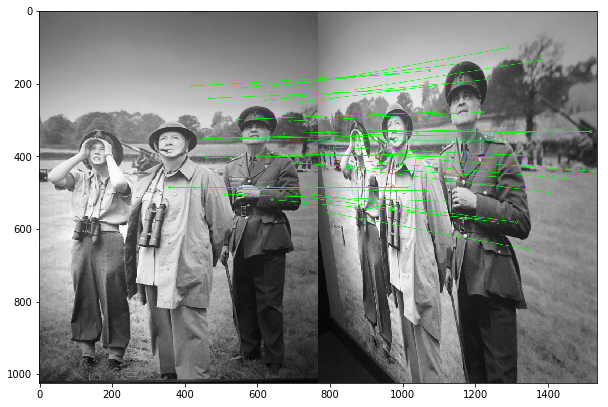

In [13]:
plt.imshow(out)
plt.show()